# STAT215A - Lab4-EDA


In [1]:
library(ggplot2)
library(dplyr)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
#readin data
image1 = read.table("image1.txt",header = F)
image2 = read.table("image2.txt",header = F)
image3 = read.table("image3.txt",header = F)


In [3]:
#rename columns
col_names =  c('y','x','label','NDAI','SD','CORR','DF','CF','BF','AF','AN')
colnames(image1) = col_names
colnames(image2) = col_names
colnames(image3) = col_names

In [4]:
#label as factor
image1$label = as.factor(image1$label)
image2$label = as.factor(image2$label)
image3$label = as.factor(image3$label)

In [6]:
images = rbind(mutate(image1, Image = 1),mutate(image2, Image = 2),mutate(image3, Image =3))

In [7]:
#plot three images with AN angle
all_eda_AN <- ggplot(width = 900, height = 300, images, aes(x = x, y = y, color = AN)) + 
  geom_point() + 
  facet_wrap(~ Image) +
  ggtitle('Three Images with AN Radiances')
  #scale_color_continuous(name='AN', low = '#3366CC', high = '#FFFFFF' )

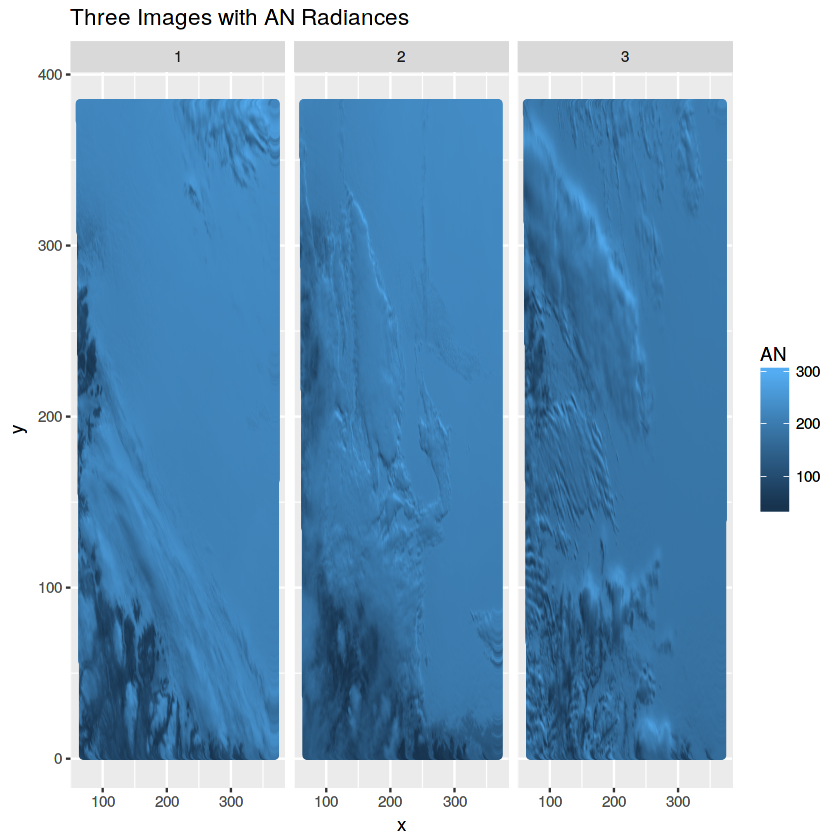

In [34]:
all_eda_AN

In [8]:
# Plot images with expert labels
all_experts <- ggplot(images, aes(x = x, y = y, color = factor(label))) + 
  geom_point() + facet_wrap(~ Image) +
  ggtitle('Expertly Labelled Images')+ 
  scale_color_discrete(name = '',breaks = c("-1", "0", "1"),
                       labels = c("Clear", "Unknown", "Cloudy"))

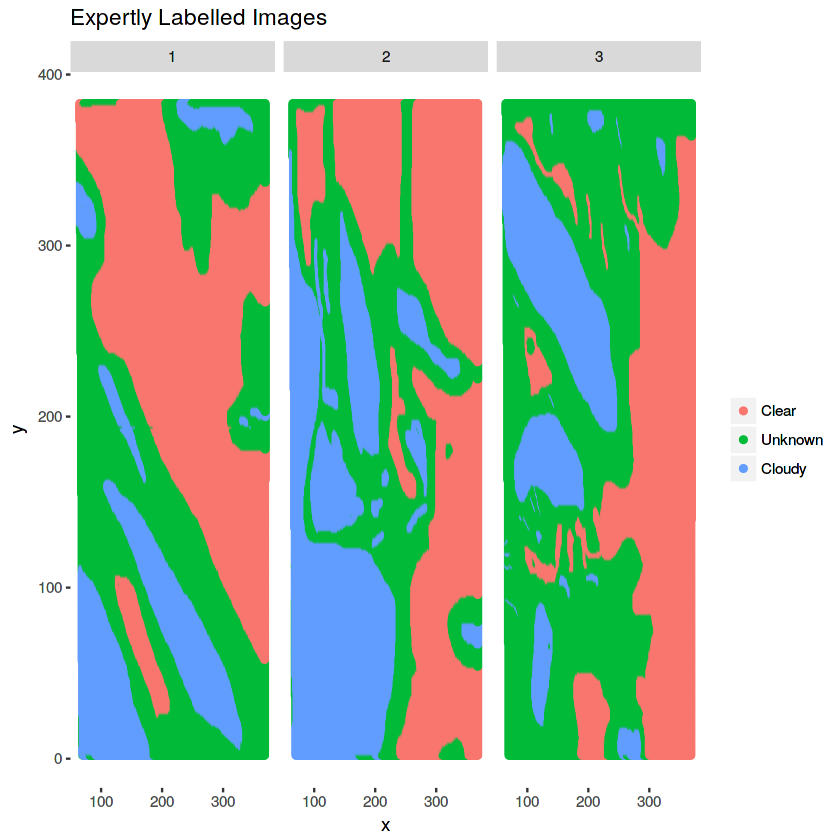

In [38]:
all_experts + theme(panel.background = element_blank())

In [9]:
#plot three images with ndai
all_ndai = ggplot(data = images, aes(x = x, y = y, col = NDAI)) +
  geom_point() + 
  facet_wrap(~ Image)


# Plot images with SD
all_sd <- ggplot(images, aes(x = x, y = y, color = SD)) + 
  geom_point() + 
  facet_wrap(~ Image) + 
  ggtitle('Mapped SD Readings') + 
  scale_color_continuous(name = 'SD', low = '#3366CC', high = '#FFFFFF')

# Plot images with CORR
all_corr <- ggplot(images, aes(x = x, y = y, color = CORR)) + 
  geom_point() + 
  facet_wrap(~ Image) + 
  ggtitle('Mapped CORR Readings') + 
  scale_color_continuous(name='CORR', low = '#3366CC', high = '#FFFFFF' )


In [10]:
# from image 1
density_image1_an = ggplot(image1) + geom_density(aes(x = AN, group = factor(label), fill = label), alpha = 0.6) +
                    ggtitle("AN density in image1")
                    
density_image1_df = ggplot(image1) + geom_density(aes(x = DF, group = factor(label), fill = label), alpha = 0.6) +
                    ggtitle("DF density in image1")

density_image1_cf = ggplot(image1) + geom_density(aes(x = CF, group = factor(label), fill = label), alpha = 0.6) +
                    ggtitle("CF density in image1")

density_image1_bf = ggplot(image1) + geom_density(aes(x = BF, group = factor(label), fill = label), alpha = 0.6) +
                    ggtitle("BF density in image1")

density_image1_af = ggplot(image1) + geom_density(aes(x = AF, group = factor(label), fill = label), alpha = 0.6) +
                    ggtitle("AF density in image1")

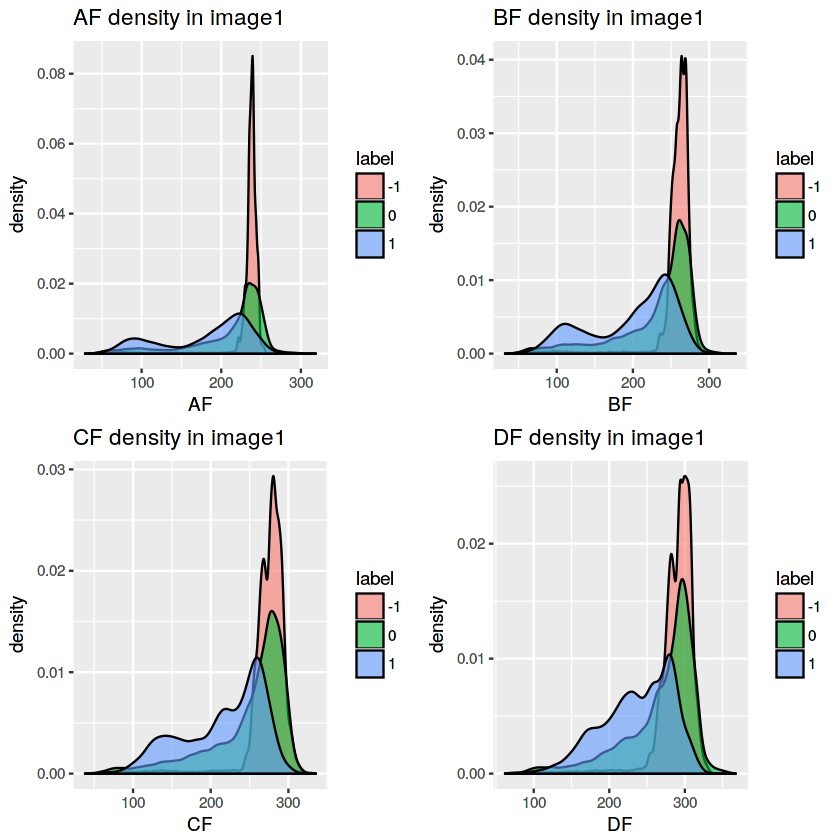

In [12]:
grid.arrange(density_image1_af,density_image1_bf,density_image1_cf,density_image1_df,ncol = 2)

In [ ]:
require(GGally)

ggpairs(data=image1, # data.frame with variables
        columns=3:6, # columns to plot, default to all.
        title="image1 data", # title of the plot
        lower = list(continuous = wrap("points", alpha = 0.3,    size=0.1), 
                      combo = wrap("dot", alpha = 0.4,            size=0.2) ),
        mapping=ggplot2::aes(colour = label)) # aesthetics, ggplot2 style